### Carregamento de dados
Carregando o dataset e verificando os tipos de dados.

In [139]:
# Importando biblioteca
import pandas as pd

In [140]:
# lendo os dados e mostrando AS primeiras linhas
dados = pd.read_excel('../raw/dados_originais.xlsx')
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Traduzindo as colunas para portugues pt-br

In [141]:

# renomeando colunas para pt-br
dados = dados.rename(columns={
    "InvoiceNo": "numero_fatura",
    "StockCode": "codigo_produto",
    "Description": "descricao",
    "Quantity": "quantidade",
    "InvoiceDate": "data_fatura",
    "UnitPrice": "preco_unitario",
    "CustomerID": "id_cliente",
    "Country": "pais"
})

# conferir
print(dados.columns)


Index(['numero_fatura', 'codigo_produto', 'descricao', 'quantidade',
       'data_fatura', 'preco_unitario', 'id_cliente', 'pais'],
      dtype='object')


In [142]:
# Verificando informações do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   numero_fatura   541909 non-null  object        
 1   codigo_produto  541909 non-null  object        
 2   descricao       540455 non-null  object        
 3   quantidade      541909 non-null  int64         
 4   data_fatura     541909 non-null  datetime64[ns]
 5   preco_unitario  541909 non-null  float64       
 6   id_cliente      406829 non-null  float64       
 7   pais            541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [143]:
# Verificando se há dados nulos
dados.isnull().sum()

numero_fatura          0
codigo_produto         0
descricao           1454
quantidade             0
data_fatura            0
preco_unitario         0
id_cliente        135080
pais                   0
dtype: int64

In [144]:
# Percentual de nulos
(dados.isnull().mean() * 100).round(2)

numero_fatura      0.00
codigo_produto     0.00
descricao          0.27
quantidade         0.00
data_fatura        0.00
preco_unitario     0.00
id_cliente        24.93
pais               0.00
dtype: float64

In [145]:
# Verificnado a analise estatística descritiva
dados.describe().T

,count,mean,min,25%,50%,75%,max,std
quantidade,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
data_fatura,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
preco_unitario,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
id_cliente,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


Coluna	Observação

quantidade	Min = -80995 e Max = 80995. Valores negativos e absurdamente altos indicam devoluções/cancelamentos e possíveis erros de cadastro.

preco_unitario	Min = -11062.06 e Max = 38970. Valores negativos e extremamente altos são suspeitos.

valor_total	Min = -168469.6 e Max = 168469.6. Extremamente discrepante em relação à média (~18).

In [146]:
# Verificação de dado duplicatos

dados.duplicated().sum()


np.int64(5268)

In [147]:
# Removendo dados duplicados
dados = dados.drop_duplicates()
dados.duplicated().sum()

np.int64(0)

<Axes: xlabel='quantidade', ylabel='Count'>

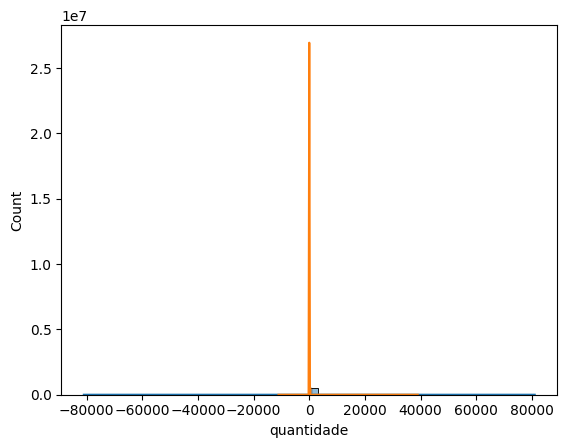

In [148]:
# Verificando Distrbuição das variaveis numéricas

import seaborn as sns
import matplotlib.pyplot as plt

# Hitograma
sns.histplot(dados['quantidade'], bins=50, kde=True)
sns.histplot(dados['preco_unitario'], bins=50, kde=True)

### Distribuição das Variáveis Numéricas

Nesta etapa, verificamos a distribuição das principais variáveis numéricas do dataset: **quantidade** e **preço unitário**.  

Utilizamos histogramas com densidade estimada (KDE) para identificar a dispersão dos valores e possíveis outliers.  

**Observações:**
- A variável `quantidade` apresenta alguns valores negativos e extremamente altos, indicando **prováveis erros de registro ou devoluções**. Esses pontos podem distorcer análises agregadas e métricas de RFM.
- A variável `preco_unitario` também mostra valores extremos, inclusive negativos, que provavelmente correspondem a **cancelamentos ou registros incorretos**.
- A maioria das vendas concentra-se em valores positivos e baixos, o que é esperado para um e-commerce de varejo.

**Ações sugeridas para preprocessamento:**
- Filtrar `quantidade > 0` e `preco_unitario > 0` antes de criar métricas agregadas como `valor_total`.
- Considerar remoção ou tratamento de outliers para análises estatísticas ou modelagem.



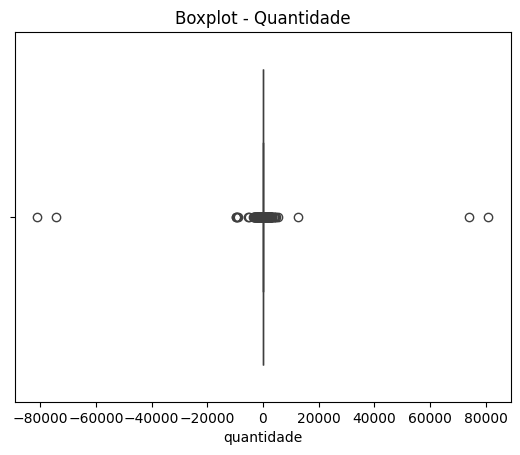

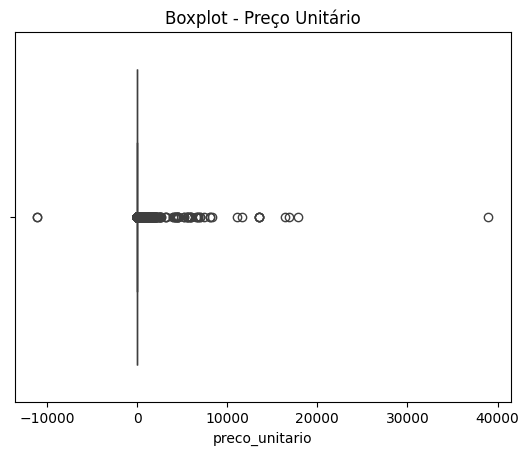

In [149]:
# Boxplot para verificação de outliers

# Boxplots para outliers
sns.boxplot(x=dados['quantidade'])
plt.title("Boxplot - Quantidade")
plt.show()

sns.boxplot(x=dados['preco_unitario'])
plt.title("Boxplot - Preço Unitário")
plt.show()


### 📊 Distribuição das Variáveis Numéricas

Nesta etapa, verificamos a distribuição das principais variáveis numéricas do dataset: **quantidade** e **preço unitário**.  

Utilizamos histogramas com densidade estimada (KDE) para identificar a dispersão dos valores e possíveis outliers.  

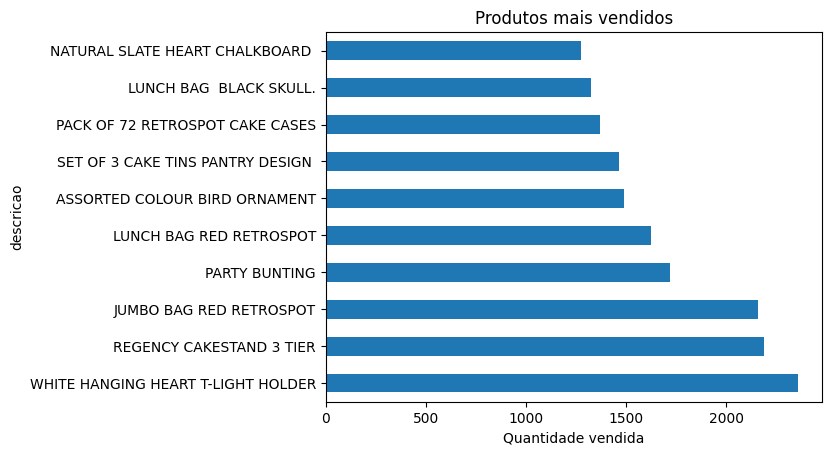

In [150]:
# Distribuição das váriaveis categóricas
dados['descricao'].value_counts().head(10).plot(kind='barh')
plt.title('Produtos mais vendidos')
plt.xlabel('Quantidade vendida')

plt.savefig('../graficos/produtos_mais_vendidos.png', dpi=300, bbox_inches='tight')

plt.show()


## 🛍️ Distribuição das Variáveis Categóricas

### Produtos Mais Vendidos
Para identificar os itens mais populares, utilizamos a contagem das ocorrências da coluna `descricao` e plotamos os 10 produtos com maior quantidade vendida.

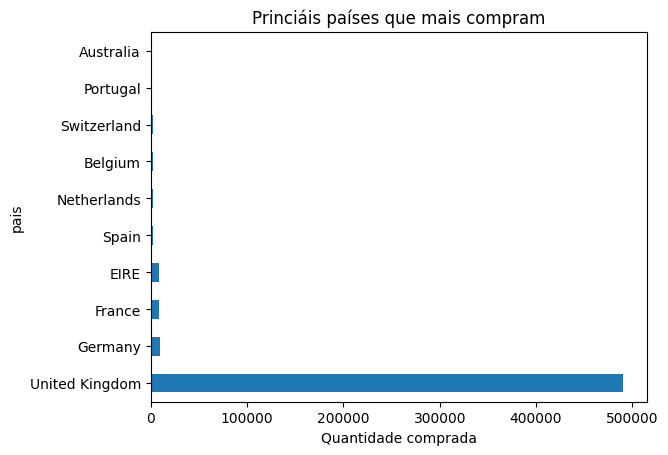

In [151]:
# Distribuição das váriaveis categóricas

dados['pais'].value_counts().head(10).plot(kind='barh')
plt.title('Princiáis países que mais compram')
plt.xlabel('Quantidade comprada')

plt.savefig('../graficos/paises_mais_compram.png', dpi=300, bbox_inches='tight')

plt.show()

📊 Resultados Obtidos
Reino Unido: Líder absoluto em volume de compras

Países Europeus: Dominam a lista dos maiores compradores

Austrália: Único país não-europeu entre os top 10

📈 Principais Países Identificados
Posição	País	Volume de Compras

1	United Kingdom	≈500,000 unidades

2	Australia	Volume significativo

3	Portugal	Volume significativo

4	Switzerland	Volume significativo

5	Belgium	Volume significativo

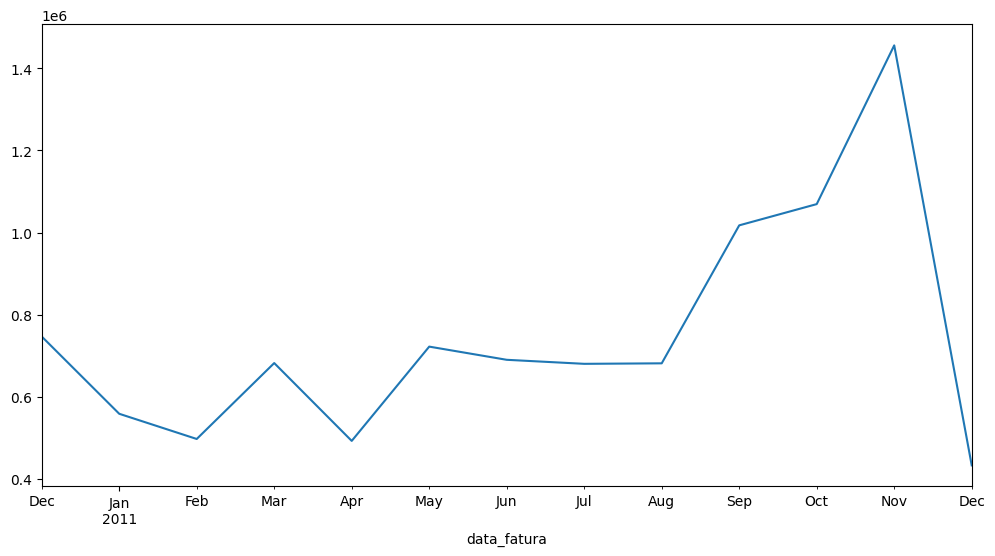

In [152]:
# Criando o grafico de linha do tempo
dados['valor_total'] = dados['quantidade'] * dados['preco_unitario']
vendas_mensais = dados.resample('ME', on='data_fatura')['valor_total'].sum()
vendas_mensais.plot(figsize=(12,6))

# salvando o grafico
plt.savefig('../graficos/volume_vendas_mensais.png', dpi=300, bbox_inches='tight')

📈 Tendência de Vendas ao Longo do Tempo  
📊 Visualização da Série Temporal

🔍 Padrões Identificados
Tendência de Crescimento: Aumento gradual no volume de vendas ao longo do período

Sazonalidade: Variações previsíveis em meses específicos 
Pico de Vendaso: Maior volume observado entre Dez/2010 e Jan/2011 
Estabilidade Relativa: Período de Mar/2011 a Jul/2011 manteve volumes consistentes

1 -Oportunidades Sazonais: Capitalizar nos períodos de alta demanda

2 - Planejamento de Estoque: Antecipar necessidades para períodos de pico

3 - Estratégias de Marketing: Desenvolver campanhas para períodos de menor movimento



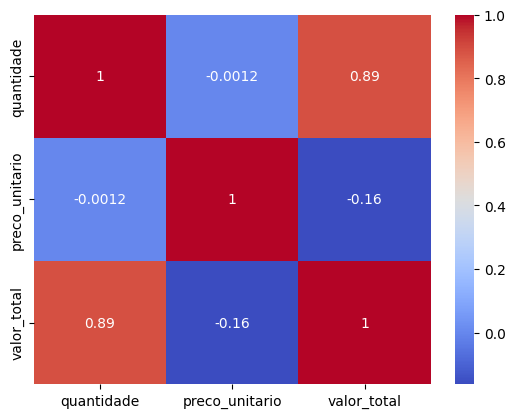

In [153]:
# Verificando correlação entre variáveis numéricas

sns.heatmap(dados[['quantidade','preco_unitario','valor_total']].corr(), annot=True, cmap='coolwarm')
# salvando o grafico
plt.savefig('../graficos/correlacao.png', dpi=300, bbox_inches='tight')
plt.show()


🔗 Matriz de Correlação das Variáveis de Vendas
📊 Visualização da Correlação

📈 Resultados da Correlação
Variáveis	Coeficiente	Interpretação
quantidade × valor_total	0.89	🔥 Forte Correlação Positiva
preco_unitario × valor_total	-0.16	🟡 Fraca Correlação Negativa
quantidade × preco_unitario	-0.0012	⚪ Correlação Praticamente Nula
🔍 Análise Detalhada das Relações
✅ Forte Correlação Positiva
quantidade → valor_total (0.89):

Relação quase perfeita esperada

Aumento na quantidade diretamente impacta no valor total

Esperado matematicamente (valor_total = quantidade × preco_unitario)

⚠️ Fraca Correlação Negativa
preco_unitario → valor_total (-0.16):

Leve tendência negativa interessante

Possível indicativo de produtos mais caros venderem menos unidades

Merece investigação mais profunda

🔄 Correlação Praticamente Nula
quantidade × preco_unitario (-0.0012):

Não há relação discernível entre preço e quantidade vendida

Estratégias de preço não impactam diretamente no volume de vendas

<Axes: xlabel='quantidade', ylabel='preco_unitario'>

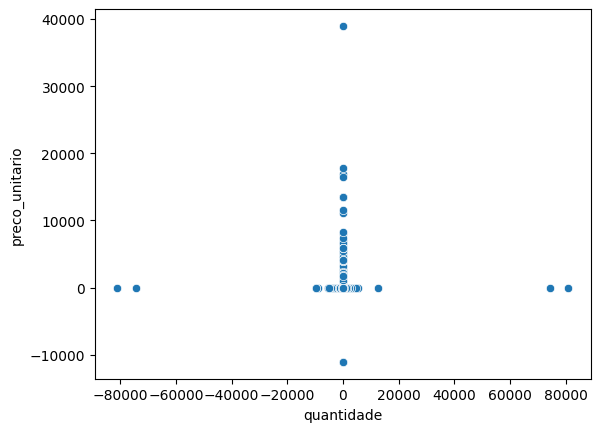

In [154]:
# Scatter para verificar tendencias 

sns.scatterplot(x='quantidade', y='preco_unitario', data=dados)

Análise de Dispersão entre Quantidade e Preço Unitário

📊 Relação entre Volume de Vendas e Preço dos Produtos

🔍 Gráfico de Dispersão para Identificação de Padrões


📈 Análise dos Padrões Identificados
🎯 Distribuição dos Dados
Concentração Principal: Maioria dos produtos entre 0-20.000 unidades e R$ 0-25.000

Outliers Significativos: Alguns produtos com preços extremamente elevados (até R$ 40.000)

Dispersão Vertical: Ampla variação de preços para quantidades similares

📊 Padrões de Comportamento
Ausência de Correlação Clara: Confirma análise anterior de correlação ≈0

Múltiplos Clusters: Possíveis segmentos de produtos com características distintas

Produtos Premium: Itens de alto preço com baixo volume de vendas

In [155]:
# Identificar com boxplot ou usando IQR:

Q1 = dados['valor_total'].quantile(0.25)
Q3 = dados['valor_total'].quantile(0.75)
IQR = Q3 - Q1
outliers = dados[(dados['valor_total'] < Q1 - 1.5*IQR) | (dados['valor_total'] > Q3 + 1.5*IQR)]
outliers.head()


,numero_fatura,codigo_produto,descricao,quantidade,data_fatura,preco_unitario,id_cliente,pais,valor_total
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80


In [156]:
# Calculando os quartis e IQR
Q1 = dados['valor_total'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = dados['valor_total'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1  # Intervalo Interquartil

# Definindo limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (25º percentil): R$ {Q1:.2f}")
print(f"Q3 (75º percentil): R$ {Q3:.2f}")
print(f"IQR: R$ {IQR:.2f}")
print(f"Limite Inferior: R$ {limite_inferior:.2f}")
print(f"Limite Superior: R$ {limite_superior:.2f}")

Q1 (25º percentil): R$ 3.75
Q3 (75º percentil): R$ 17.40
IQR: R$ 13.65
Limite Inferior: R$ -16.72
Limite Superior: R$ 37.88


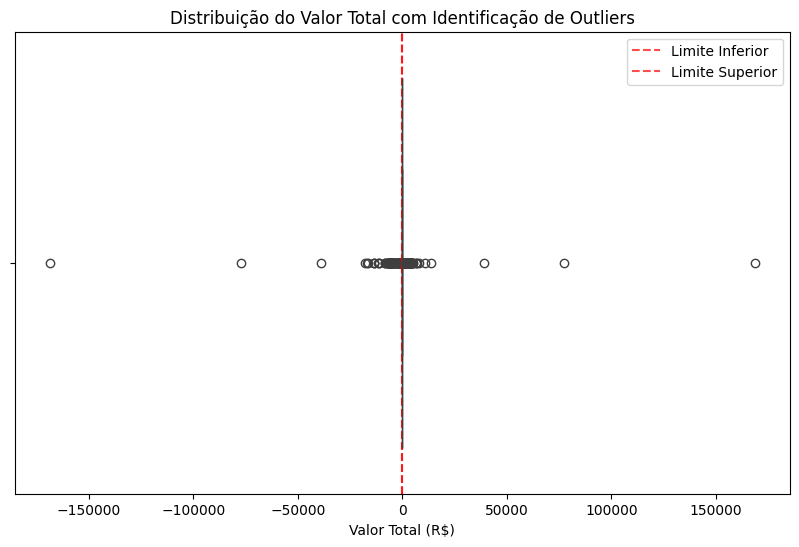

In [157]:
# Filtrando os outliers
outliers = dados[(dados['valor_total'] < limite_inferior) | 
                 (dados['valor_total'] > limite_superior)]
# Criando boxplot para visualização dos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['valor_total'])
plt.title('Distribuição do Valor Total com Identificação de Outliers')
plt.xlabel('Valor Total (R$)')

# Adicionando linhas de referência
plt.axvline(x=limite_inferior, color='red', linestyle='--', alpha=0.7, label='Limite Inferior')
plt.axvline(x=limite_superior, color='red', linestyle='--', alpha=0.7, label='Limite Superior')

plt.legend()
plt.savefig('../graficos/boxplot_outliers_valor_total.png', dpi=300, bbox_inches='tight')
plt.show()

📊 Análise dos Tipos de Outliers
📈 Outliers Superiores (Valores muito altos)
Possíveis causas: Vendas em grande quantidade, produtos de alto valor, pedidos corporativos

Impacto: Distorcem a média para cima, representam oportunidades de negócio

📉 Outliers Inferiores (Valores muito baitos/negativos)
Possíveis causas: Devoluções, ajustes contábeis, erros de lançamento

Impacto: Podem indicar problemas operacionais ou need de ajustes no processo

🎯 Insights e Ações Recomendadas
🔍 Para Outliers Superiores:
✅ Validar se são vendas legítimas

✅ Identificar clientes com grandes compras

✅ Desenvolver estratégias para similar accounts

🔍 Para Outliers Inferiores:
✅ Investigar causas dos valores negativos

✅ Verificar processo de devoluções

✅ Auditar lançamentos contábeis

In [158]:
# salvar os dados tratados
dados.to_csv('../raw/dados_verificados.csv', index=False)